In [108]:
import csv
import pandas as pd
import numpy as np
data = pd.read_csv('data_for_student_case-2.csv')
data

,txid,bookingdate,issuercountrycode,txvariantcode,bin,amount,currencycode,shoppercountrycode,shopperinteraction,simple_journal,cardverificationcodesupplied,cvcresponsecode,creationdate,accountcode,mail_id,ip_id,card_id
0,1,2015-11-09 14:26:51,MX,mccredit,530056.0,64800.0,MXN,MX,Ecommerce,Chargeback,True,0,2015-07-01 23:03:11,MexicoAccount,email68370,ip111778,card184798
1,2,2015-11-09 14:27:38,MX,mccredit,547046.0,44900.0,MXN,MX,Ecommerce,Chargeback,True,0,2015-07-02 04:50:55,MexicoAccount,email101299,ip78749,card151595
2,3,2015-11-23 16:34:16,MX,mccredit,528843.0,149900.0,MXN,MX,Ecommerce,Chargeback,True,0,2015-07-02 14:30:28,MexicoAccount,email278604,ip70594,card242142
3,4,2015-11-23 16:34:51,MX,mccredit,547146.0,109900.0,MXN,MX,Ecommerce,Chargeback,True,0,2015-07-03 07:53:37,MexicoAccount,email47409,ip113648,card181744
4,5,2015-11-09 14:26:08,MX,visaclassic,477291.0,89900.0,MXN,MX,Ecommerce,Chargeback,True,0,2015-07-08 18:35:35,MexicoAccount,email205501,ip83553,card97271
5,6,2015-11-09 14:26:25,MX,visaclassic,493161.0,79900.0,MXN,MX,Ecommerce,Chargeback,True,0,2015-07-08 23:04:26,MexicoAccount,email243511,ip112410,card159816
6,7,2015-11-09 14:26:47,MX,visaclassic,477291.0,69900.0,MXN,MX,Ecommerce,Chargeback,True,0,2015-07-09 02:31:36,MexicoAccount,email137086,ip83481,card251249
7,8,2015-11-23 16:34:29,MX,mccredit,520416.0,129900.0,MXN,MX,Ecommerce,Chargeback,True,0,2015-07-09 04:56:48,MexicoAccount,email295644,ip66704,card70297
8,9,2015-12-08 19:58:35,MX,visaclassic,477291.0,129900.0,MXN,MX,Ecommerce,Chargeback,True,0,2015-07-09 22:55:40,MexicoAccount,email115605,ip68088,card39791
9,10,2015-11-09 14:25:50,MX,mccredit,549138.0,99900.0,MXN,MX,Ecommerce,Chargeback,True,0,2015-07-11 09:44:14,MexicoAccount,email182966,ip113025,card160922


In [109]:
## the whole time period 
print(min(data['bookingdate']))
print(max(data['bookingdate']))
print(min(data['creationdate']))
print(max(data['creationdate']))

## playing with datetime in python, convert string to datetime
from datetime import datetime
date_format = "%Y-%m-%d %H:%M:%S"
a = datetime.strptime('2015-07-01 00:00:15', date_format)
b = datetime.strptime('2015-10-31 23:59:12', date_format)
delta = b - a
period = delta.days
print(period) # that's it
datea = a.date()
timea = a.time()
print(datea)
print(timea)
type(datea)
type(a)
type(data['creationdate'][1])
data['creationdate'][1][:10] #pick the first 10 bits of string --> only date in datetime

2015-07-01 00:00:15
2016-03-05 05:35:41
2015-07-01 00:00:15
2015-10-31 23:59:12
122
2015-07-01
00:00:15


'2015-07-02'

In [111]:
## check how many kinds of currency are there?
currencylist = datacharge['currencycode'].unique()
print(currencylist)

##build a dic of currency rate against EUR
currencyconvert = {"AUD":0.680237,"MXN":0.0487438,"NZD":0.630313,"GBP":1.18285,"SEK":0.103558}

['MXN' 'AUD' 'NZD' 'GBP' 'SEK']


In [113]:
## convert all the transaction amount to EUR
amountEUR = []
for i in data.index:
    if data['currencycode'][i] == "MXN":
        amountEUR.append(currencyconvert["MXN"]*data['amount'][i])
#         print(datacharge.loc[i,['currencycode']])
    if data['currencycode'][i] == "AUD":
        amountEUR.append(currencyconvert["AUD"]*data['amount'][i])

    if data['currencycode'][i] == "NZD":
        amountEUR.append(currencyconvert["NZD"]*data['amount'][i])

    if data['currencycode'][i] == "GBP":
        amountEUR.append(currencyconvert["GBP"]*data['amount'][i])

    if data['currencycode'][i] == "SEK":
        amountEUR.append(currencyconvert["SEK"]*data['amount'][i])
amountEUR


[3158.5982399999998,
 2188.5966199999998,
 7306.6956199999995,
 5356.94362,
 4382.0676199999998,
 3894.6296199999997,
 3407.1916199999996,
 6331.8196199999993,
 6331.8196199999993,
 4869.5056199999999,
 6331.8196199999993,
 4139.0797769999999,
 5844.3816199999992,
 4869.5056199999999,
 6721.7700199999999,
 5620.16014,
 5015.7370199999996,
 7794.1336199999996,
 4346.2409269999998,
 5844.3816199999992,
 7838.0030399999996,
 4382.0676199999998,
 4772.0180199999995,
 6331.8196199999993,
 9353.9352199999994,
 4553.4020769999997,
 14130.827619999998,
 5795.6378199999999,
 16080.579619999999,
 8866.4972199999993,
 8282.302776999999,
 4869.5056199999999,
 6331.8196199999993,
 4089.6048199999996,
 3894.6296199999997,
 5844.3816199999992,
 10611.525259999999,
 4864.6312399999997,
 5846.3313719999996,
 5356.94362,
 9743.8856199999991,
 4674.53042,
 5064.4808199999998,
 6331.8196199999993,
 5356.94362,
 3650.9106199999997,
 5356.94362,
 6331.8196199999993,
 2914.8792399999998,
 4869.5056199999999,

In [117]:
## add  the new amount in EUR to data as new column
data['amountEUR']=amountEUR
data

,txid,bookingdate,issuercountrycode,txvariantcode,bin,amount,currencycode,shoppercountrycode,shopperinteraction,simple_journal,cardverificationcodesupplied,cvcresponsecode,creationdate,accountcode,mail_id,ip_id,card_id,amountEUR
0,1,2015-11-09 14:26:51,MX,mccredit,530056.0,64800.0,MXN,MX,Ecommerce,Chargeback,True,0,2015-07-01 23:03:11,MexicoAccount,email68370,ip111778,card184798,3158.598240
1,2,2015-11-09 14:27:38,MX,mccredit,547046.0,44900.0,MXN,MX,Ecommerce,Chargeback,True,0,2015-07-02 04:50:55,MexicoAccount,email101299,ip78749,card151595,2188.596620
2,3,2015-11-23 16:34:16,MX,mccredit,528843.0,149900.0,MXN,MX,Ecommerce,Chargeback,True,0,2015-07-02 14:30:28,MexicoAccount,email278604,ip70594,card242142,7306.695620
3,4,2015-11-23 16:34:51,MX,mccredit,547146.0,109900.0,MXN,MX,Ecommerce,Chargeback,True,0,2015-07-03 07:53:37,MexicoAccount,email47409,ip113648,card181744,5356.943620
4,5,2015-11-09 14:26:08,MX,visaclassic,477291.0,89900.0,MXN,MX,Ecommerce,Chargeback,True,0,2015-07-08 18:35:35,MexicoAccount,email205501,ip83553,card97271,4382.067620
5,6,2015-11-09 14:26:25,MX,visaclassic,493161.0,79900.0,MXN,MX,Ecommerce,Chargeback,True,0,2015-07-08 23:04:26,MexicoAccount,email243511,ip112410,card159816,3894.629620
6,7,2015-11-09 14:26:47,MX,visaclassic,477291.0,69900.0,MXN,MX,Ecommerce,Chargeback,True,0,2015-07-09 02:31:36,MexicoAccount,email137086,ip83481,card251249,3407.191620
7,8,2015-11-23 16:34:29,MX,mccredit,520416.0,129900.0,MXN,MX,Ecommerce,Chargeback,True,0,2015-07-09 04:56:48,MexicoAccount,email295644,ip66704,card70297,6331.819620
8,9,2015-12-08 19:58:35,MX,visaclassic,477291.0,129900.0,MXN,MX,Ecommerce,Chargeback,True,0,2015-07-09 22:55:40,MexicoAccount,email115605,ip68088,card39791,6331.819620
9,10,2015-11-09 14:25:50,MX,mccredit,549138.0,99900.0,MXN,MX,Ecommerce,Chargeback,True,0,2015-07-11 09:44:14,MexicoAccount,email182966,ip113025,card160922,4869.505620


In [119]:
## build a new dataframe with transactions labeled as "Chargeback","Settled","Refused"
data_chargeback = data[data['simple_journal']=='Chargeback']
data_settled = data[data['simple_journal']=='Settled']
data_refused = data[data['simple_journal']=='Refused']

## sort the 'Chargeback' transactions by 'creationdate'
# result = data_chargeback.sort(['creationdate'])
# result

##calculate the ratio of each type
c = len(data_chargeback)/len(data)
s = len(data_settled)/len(data)
r = len(data_refused)/len(data)

print ('\n The number of "%s"  is %d, consisting %f of total transactions.' % ("Chargeback", len(data_chargeback),c))
print ('\n The number of "%s"  is %d, consisting %f of total transactions.' % ("Settled", len(data_settled),s))
print ('\n The number of "%s"  is %d, consisting %f of total transactions.' % ("Refused", len(data_refused),r))
        


 The number of "Chargeback"  is 345, consisting 0.001188 of total transactions.

 The number of "Settled"  is 236691, consisting 0.815102 of total transactions.

 The number of "Refused"  is 53346, consisting 0.183710 of total transactions.


In [120]:
## in order to do the aggregate analysis by day,
## build a function to convert the datetime in string to datetime in python, 
## and pick only the date excepting time, 
def perday(df,DateName):
    df[DateName] = pd.to_datetime(df[DateName])
    df[DateName] = df[DateName].dt.date
    return df

datacharge = perday(data_chargeback,'creationdate')
datasettled = perday(data_settled,'creationdate')
datarefused = perday(data_refused,'creationdate')

/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [162]:
##group the transaction by day, count the number of transactions per day 
## calculate the average amount of transactions per day
perday_nchargeback = datacharge.groupby('creationdate').size()
perday_mchargeback = datacharge.groupby('creationdate')['amountEUR'].mean()

## for 'settled'
perday_nsettled = datasettled.groupby('creationdate').size()
perday_msettled = datasettled.groupby('creationdate')['amountEUR'].mean()

## for 'refused'
perday_nrefused = datarefused.groupby('creationdate').size()
perday_mrefused = datarefused.groupby('creationdate')['amountEUR'].mean()

##generate the array of date for each type
datelistc = datacharge['creationdate'].unique()
datelists = datasettled['creationdate'].unique()
datelistr = datarefused['creationdate'].unique()
datelist = []
for i in range(len(datelists)):
    datelist.append(i)
datelist
perday_msettled

creationdate
2015-07-01    7513.648960
2015-07-02    7513.729293
2015-07-03    7499.068778
2015-07-04    7428.954707
2015-07-05    7739.455802
2015-07-06    7655.185125
2015-07-07    7249.233587
2015-07-08    7613.354266
2015-07-09    7619.576317
2015-07-10    7312.063166
2015-07-11    7632.252543
2015-07-12    7501.856507
2015-07-13    7667.106621
2015-07-14    7436.195137
2015-07-15    8000.648131
2015-07-16    7797.042363
2015-07-17    8024.539120
2015-07-18    8086.630266
2015-07-19    8020.545962
2015-07-20    7913.140437
2015-07-21    7994.695494
2015-07-22    7891.221650
2015-07-23    7963.062555
2015-07-24    7169.825819
2015-07-25    7937.407211
2015-07-26    7566.467871
2015-07-27    8030.432331
2015-07-28    7772.687307
2015-07-29    8152.771375
2015-07-30    8321.745600
                 ...     
2015-10-02    8827.143773
2015-10-03    8458.403028
2015-10-04    8480.388288
2015-10-05    8298.283138
2015-10-06    8164.873723
2015-10-07    8506.807169
2015-10-08    8293.735846

In [164]:
len(perday_nsettled)
datelistc

array([datetime.date(2015, 7, 1), datetime.date(2015, 7, 2),
       datetime.date(2015, 7, 3), datetime.date(2015, 7, 8),
       datetime.date(2015, 7, 9), datetime.date(2015, 7, 11),
       datetime.date(2015, 7, 15), datetime.date(2015, 7, 17),
       datetime.date(2015, 7, 19), datetime.date(2015, 7, 21),
       datetime.date(2015, 7, 22), datetime.date(2015, 7, 23),
       datetime.date(2015, 7, 25), datetime.date(2015, 7, 26),
       datetime.date(2015, 7, 28), datetime.date(2015, 7, 29),
       datetime.date(2015, 7, 30), datetime.date(2015, 7, 31),
       datetime.date(2015, 8, 1), datetime.date(2015, 8, 3),
       datetime.date(2015, 8, 4), datetime.date(2015, 8, 5),
       datetime.date(2015, 8, 6), datetime.date(2015, 8, 8),
       datetime.date(2015, 8, 10), datetime.date(2015, 8, 12),
       datetime.date(2015, 8, 13), datetime.date(2015, 8, 15),
       datetime.date(2015, 8, 18), datetime.date(2015, 8, 20),
       datetime.date(2015, 8, 22), datetime.date(2015, 8, 25),
   

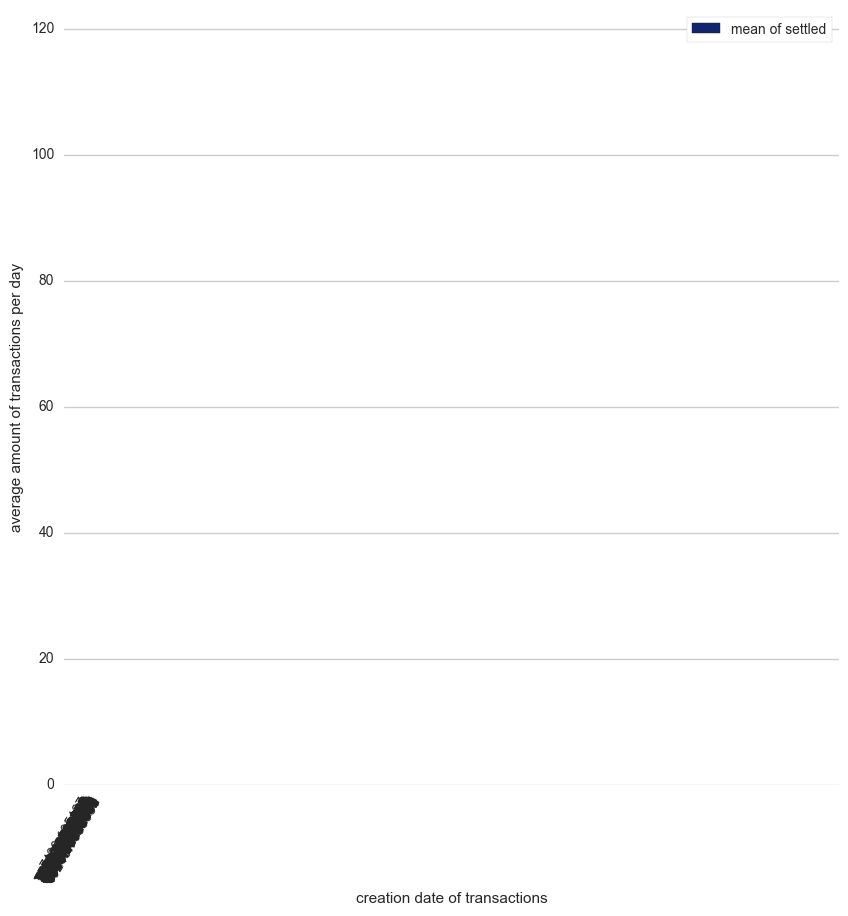

In [151]:
## make barplot for number of transactions and average amount

import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))

# Load the example car crash dataset
# crashes = sns.load_dataset("car_crashes").sort_values("total", ascending=False)

# Plot the total crashes
# sns.set_color_codes("pastel")
# sns.barplot(x="total", y="abbrev", data=crashes,
#             label="Total", color="b")

# sns.barplot(x=perday_mchargeback, y=datelist,
#             label="mean of chargeback", color="b")

# Plot the crashes where alcohol was involved
sns.set_color_codes("dark")
# sns.barplot(x="alcohol", y="abbrev", data=crashes,
#             label="Alcohol-involved", color="b")

sns.barplot(x = perday_msettled, y=datelist,
            label="mean of settled", color="b")


# sns.set_color_codes("muted")
# sns.barplot(x=perday_mrefused, y=datelist,
#             label="mean of refused", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="upper right", frameon=True)
# ,
ax.set(xlim=(0,10000),ylim=(0,len(datelist)), ylabel="average amount of transactions per day",
       xlabel="creation date of transactions")
sns.despine(left=True, bottom=True)
# sns.barplot(x=datelist)
plt.xticks(rotation=60)
# ax.set_xticks(np.arange(1,123,5))
#-------------TO DO :set xticks ---------------#
plt.show()

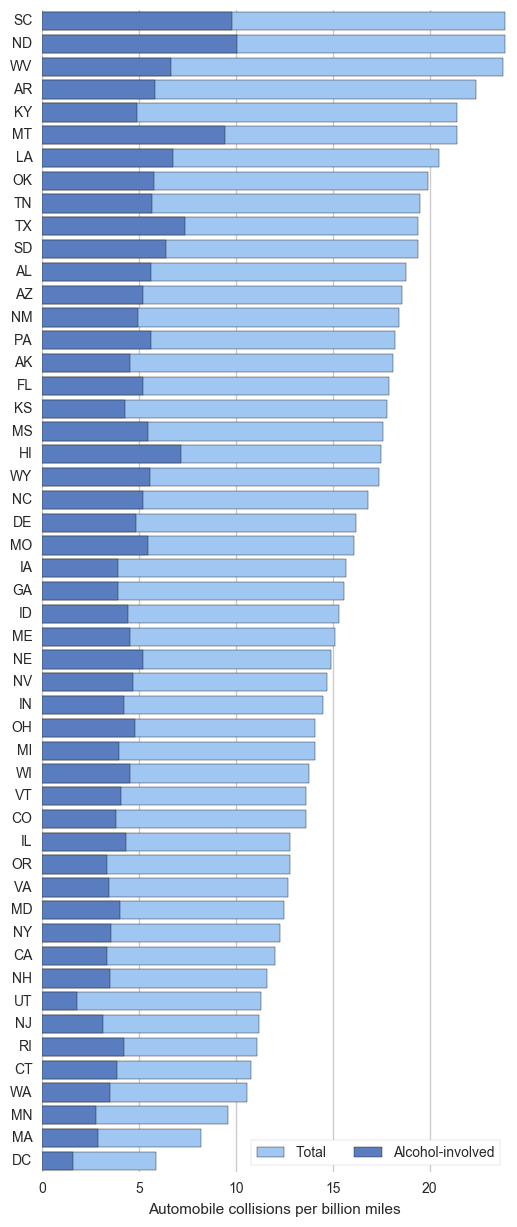

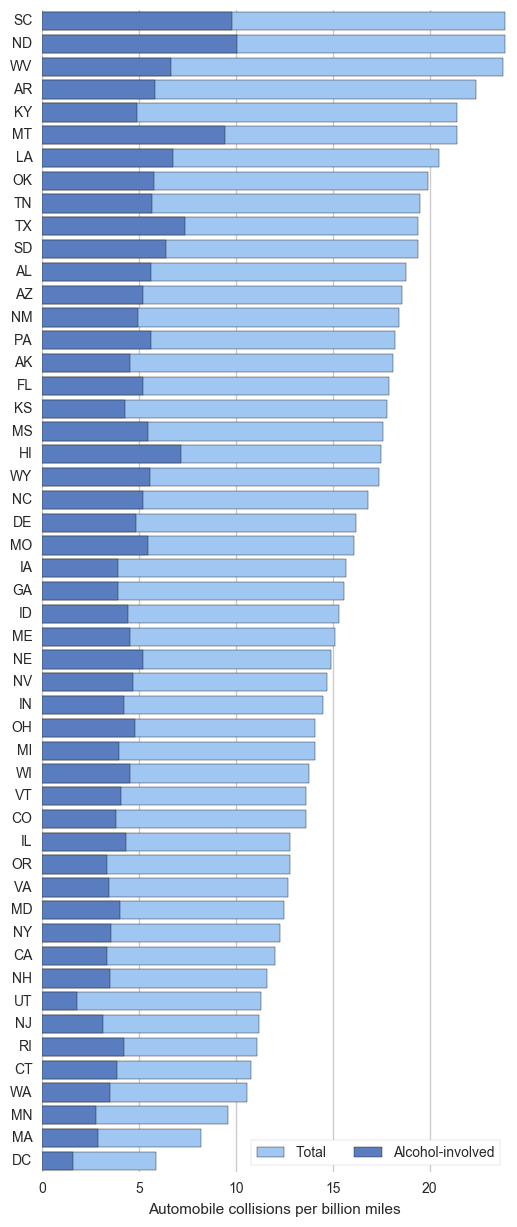

In [143]:
crashes = sns.load_dataset("car_crashes").sort_values("total", ascending=False)
crashes
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))

# Load the example car crash dataset
crashes = sns.load_dataset("car_crashes").sort_values("total", ascending=False)

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="total", y="abbrev", data=crashes,
            label="Total", color="b")

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(x="alcohol", y="abbrev", data=crashes,
            label="Alcohol-involved", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 24), ylabel="",
       xlabel="Automobile collisions per billion miles")
sns.despine(left=True, bottom=True)
plt.show()